RK-1 Highest Absolute Error: 182.15639
RK-2 Highest Absolute Error: 0.71838
RK-4 Highest Absolute Error: 0.35710


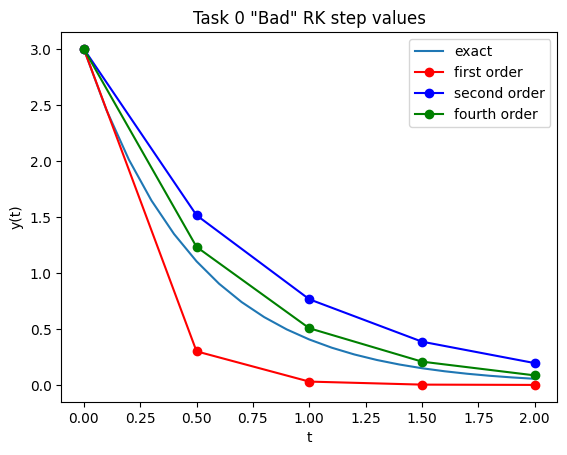

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exact_func(x): # the exact function, calculated ahead of time
    return 3*np.e**(-2*x)

def diff_eq(x): #the differential equation to solve / approximate
    return -2*x

def RK(method, f, h, IC, interval):
    # choose method, function, step size (h), initial condition(s), and interval
    # starting from 0

    # keep track of the approximated values, will access to create next approximations
    q_values = [ IC ]

    for i in range(int(interval/h)):
        # keep going for however many steps are needed in the approximation

        if method == 'first': #first order

            q_new = q_values[-1] + f(q_values[-1]) * h

        elif method == 'second': #second order
            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            q_new = q_values[-1] + k2*h

        else:
            assert method == 'fourth' # fourh order

            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            y2 = q_values[-1]+k2*h/2
            k3 = f(y2)
            y3 = q_values[-1]+k3*h
            k4= f(y3)

            q_new = q_values[-1] + (k1+2*k2+2*k3+k4) * h/6

        # add new approximated point to the saved values to be used for the
        # next approximations
        q_values.append(q_new)

    # return the full approximated array
    return np.array(q_values)

def main():
    # define four step sizes for exact equation and different RK orders
    h_exact = 0.1
    h_rk_1 = 0.45
    h_rk_2 = 0.45
    h_rk_4 = 0.45

    # call RK methods
    IC = 3
    interval = 2
    first = RK("first", diff_eq, h_rk_1, IC, interval)
    second = RK("second", diff_eq, h_rk_2, IC, interval)
    fourth = RK("fourth", diff_eq, h_rk_4, IC, interval)

    # plot each RK method
    fig = plt.figure()

    first_space = np.linspace(0, interval, int(interval/h_rk_1)+1)
    second_space = np.linspace(0, interval, int(interval/h_rk_2)+1)
    fourth_space = np.linspace(0, interval, int(interval/h_rk_4)+1)

    v = np.linspace(0,interval, int(interval/h_exact) + 1)

    plt.plot(v, exact_func(v))
    plt.plot(first_space, first, "-or")
    plt.plot(second_space, second, "-ob")
    plt.plot(fourth_space, fourth, "-og")
    plt.legend(["exact", "first order", "second order", "fourth order"])
    plt.title("Task 0 \"Bad\" RK step values")
    plt.xlabel("t")
    plt.ylabel("y(t)")

    # Find the highest absolute errors
    first_err = second_err = fourth_err = 0
    for i in range(len(first_space)):
      if(first[i]!=0):
        first_err = max(abs((exact_func(first_space[i]) - first[i]) / first[i]), \
                        first_err)

    for i in range(len(second_space)):
      if(second[i]!=0):
        second_err = max(abs((exact_func(second_space[i]) - second[i]) / second[i]), \
                         second_err)

    for i in range(len(fourth_space)):
      if(fourth[i]!=0):
        fourth_err = max(abs((exact_func(fourth_space[i]) - fourth[i]) / fourth[i]), \
                         fourth_err)

    print("RK-1 Highest Absolute Error: %.5f" % first_err)
    print("RK-2 Highest Absolute Error: %.5f" % second_err)
    print("RK-4 Highest Absolute Error: %.5f" % fourth_err)

    plt.show()

main()

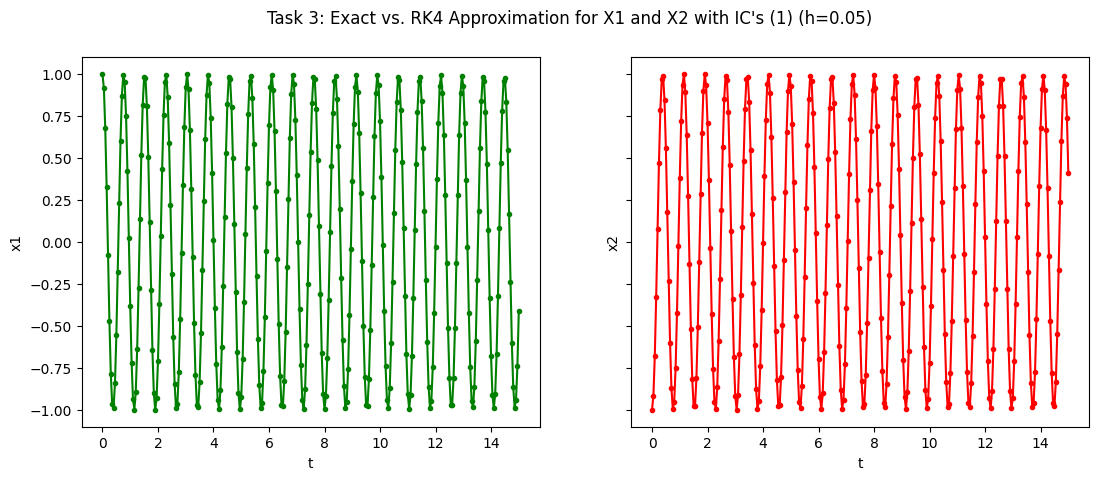

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constants given by the system
OMG_1 = np.sqrt(68)
OMG_2 = 8
K_1 = 64
K_2 = 2
m = 1

# define a q_matrix for the first-order differential as described in theory
q_mat =  np.array([[0, 1, 0, 0],
                   [-((K_1+K_2) / m), 0, K_2/m, 0],
                   [0, 0, 0, 1],
                   [K_2/m, 0, -((K_1+K_2) / m), 0]], np.float32)

# exact function of x1 and x2 given in write-up
def exact_func_x1(x):
    return 0.5*(np.cos(OMG_1*x) + np.cos(OMG_2*x))
def exact_func_x2(x):
    return 0.5*(-np.cos(OMG_1*x) + np.cos(OMG_2*x))

# define the first-order differential equation as given by theory with matrix multiplication
def diff_eq(x):
    return np.matmul(q_mat, x)

def RK4(f, h, IC, interval):
    # approximate values, starting at the initial condition
    q_values = [ IC ]

    # for the total amount of the steps in the interval...
    for i in range(int(interval/h)):
      # 4th order RK algo:
      k1 = f(q_values[-1])
      y1 = q_values[-1]+k1*h/2
      k2 = f(y1)
      y2 = q_values[-1]+k2*h/2
      k3 = f(y2)
      y3 = q_values[-1]+k3*h
      k4 = f(y3)

      # define a new guess-point and add to saved approximate values
      q_new = q_values[-1] + (k1+2*k2+2*k3+k4) * h/6
      q_values.append(q_new)

    return np.array(q_values)

def main():
    # define the step size, initial condition, and interval
    h = 0.05
    IC = [1, 0, -1, 0]
    interval = 15

    # run rk4 and save the first and third columns (x1 and x2)
    q = RK4(diff_eq, h, IC, interval)
    x_1 = q[:, 0]
    x_2 = q[:, 2]

    # plot findings
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig.set_figwidth(13)
    plt.suptitle("Task 3: Exact vs. RK4 Approximation for X1 and X2 with IC's (1) (h=0.05)")

    u = np.linspace(0, interval, int(interval/h) + 1)
    v = np.linspace(0, interval, 500)

    # ax1.plot(v, exact_func_x1(v))
    ax1.plot(u, x_1, "-og", markersize=3)
    # ax1.legend(["Exact", "RK-4 Approx."])
    ax1.set_xlabel("t")
    ax1.set_ylabel("x1")

    # ax2.plot(v, exact_func_x2(v))
    ax2.plot(u, x_2, "-or", markersize=3)
    # ax2.legend(["Exact", "RK-4 Approx."])
    ax2.set_xlabel("t")
    ax2.set_ylabel("x2")

    plt.show()

main()

RK-1 Highest Absolute Error: 0.04958
RK-2 Highest Absolute Error: 0.04915
RK-4 Highest Absolute Error: 0.04555


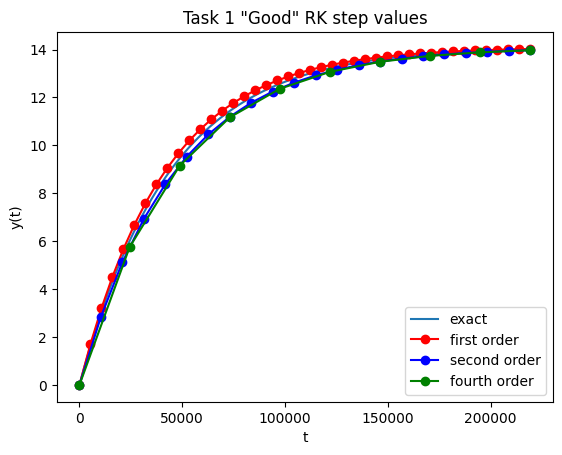

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define constants for the system
D = 1
P_in = 1.379*10**5
K = 5.464*10**8
p = 997
g = 9.81

# calculate tau
tau = (K*np.pi*D**2)/(4*p*g)

# define exact function as caculated in theory
def exact_func(x):
    return 14.0994*(1-np.e**(-2.279*10**(-5)*x))

# write differential equation as derived in theory
def diff_eq(x):
    return (4*(P_in-p*g*x))/(K*np.pi*D**2)

def RK(method, f, h, IC, interval):
    # save approximate values in q_values
    q_values = [ IC ]

    for i in range(int(interval/h)):

        if method == 'first': #first order

            q_new = q_values[-1] + f(q_values[-1]) * h

        elif method == 'second': #second order
            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            q_new = q_values[-1] + k2*h

        else:
            assert method == 'fourth' # fourh order

            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            y2 = q_values[-1]+k2*h/2
            k3 = f(y2)
            y3 = q_values[-1]+k3*h
            k4= f(y3)

            q_new = q_values[-1] + (k1+2*k2+2*k3+k4) * h/6

        # add new value to the list of current values to be used for next guess
        q_values.append(q_new)

    return np.array(q_values)

def main():
    # define four step sizes for exact equation and different RK orders
    h_exact = tau/100
    h_rk_1 = 5300
    h_rk_2 = 10000
    h_rk_4 = 23000

    # call RK methods
    IC = 0
    interval = 5*tau
    first = RK("first", diff_eq, h_rk_1, IC, interval)
    second = RK("second", diff_eq, h_rk_2, IC, interval)
    fourth = RK("fourth", diff_eq, h_rk_4, IC, interval)

    # plot each RK method
    fig = plt.figure()

    first_space = np.linspace(0, interval, int(interval/h_rk_1)+1)
    second_space = np.linspace(0, interval, int(interval/h_rk_2)+1)
    fourth_space = np.linspace(0, interval, int(interval/h_rk_4)+1)

    v = np.linspace(0,interval, int(interval/h_exact) + 1)

    plt.plot(v, exact_func(v))
    plt.plot(first_space, first, "-or")
    plt.plot(second_space, second, "-ob")
    plt.plot(fourth_space, fourth, "-og")
    plt.legend(["exact", "first order", "second order", "fourth order"])
    plt.title("Task 1 \"Good\" RK step values")
    plt.xlabel("t")
    plt.ylabel("y(t)")

    # Find the highest absolute errors

    first_err = second_err = fourth_err = 0
    for i in range(len(first_space)):
      if(first[i]!=0):
        first_err = max(abs((exact_func(first_space[i]) - first[i]) / first[i]), \
                        first_err)

    for i in range(len(second_space)):
      if(second[i]!=0):
        second_err = max(abs((exact_func(second_space[i]) - second[i]) / second[i]), \
                         second_err)

    for i in range(len(fourth_space)):
      if(fourth[i]!=0):
        fourth_err = max(abs((exact_func(fourth_space[i]) - fourth[i]) / fourth[i]), \
                         fourth_err)

    print("RK-1 Highest Absolute Error: %.5f" % first_err)
    print("RK-2 Highest Absolute Error: %.5f" % second_err)
    print("RK-4 Highest Absolute Error: %.5f" % fourth_err)

    plt.show()

main()

RK-1 Highest Absolute Error: 0.28971
RK-2 Highest Absolute Error: 0.38678
RK-4 Highest Absolute Error: 0.30606


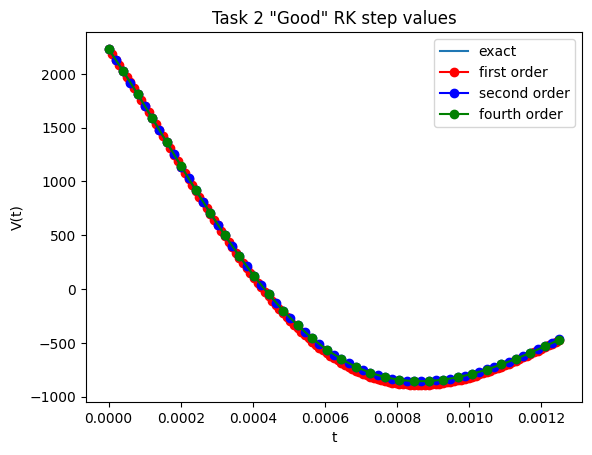

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R = 250
C = 1 * 10 ** (-6)
L = 112 * 10 ** (-3)

w_n = 1 / (np.sqrt(L * C))  # Natural frequency
d_r = (R / 2) * np.sqrt(C / L)  # Damping ratio
phi = np.arctan(np.sqrt(1 - d_r ** 2) / d_r)  # Phase shift
tc = R*C # time constant

# define exact function as caculated in theory
def exact_func(t):
  return (-2*d_r*w_n/np.sqrt(1-d_r**2))*np.exp(-d_r*w_n*t)*np.sin(np.sqrt(1-d_r**2)*w_n*t-phi)

# write differential equation with state-space first-order matrix
q_mat = np.array([[0,1],[-1/(L*C), -R/L]])

def diff_eq(x):
  return np.matmul(q_mat,x)

def RK(method, f, h, IC, interval):
    # save approximate values in q_values
    q_values = [ IC ]

    for i in range(int(interval/h)):

        if method == 'first': #first order

            q_new = q_values[-1] + f(q_values[-1]) * h

        elif method == 'second': #second order
            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            q_new = q_values[-1] + k2*h

        else:
            assert method == 'fourth' # fourh order

            k1 = f(q_values[-1])
            y1 = q_values[-1]+k1*h/2
            k2 = f(y1)
            y2 = q_values[-1]+k2*h/2
            k3 = f(y2)
            y3 = q_values[-1]+k3*h
            k4= f(y3)

            q_new = q_values[-1] + (k1+2*k2+2*k3+k4) * h/6

        # add new value to the list of current values to be used for next guess
        q_values.append(q_new)

    return np.array(q_values)

def main():
    # define four step sizes for exact equation and different RK orders
    h_exact = tc/100
    h_rk_1 = 0.00001
    h_rk_2 = 0.00002
    h_rk_4 = 0.00004

    # call RK methods
    IC = [0, 2232]
    interval = 5*tc
    first_q = RK("first", diff_eq, h_rk_1, IC, interval)
    second_q = RK("second", diff_eq, h_rk_2, IC, interval)
    fourth_q = RK("fourth", diff_eq, h_rk_4, IC, interval)

    first = first_q[:, 1]
    second = second_q[:, 1]
    fourth = fourth_q[:, 1]


    # plot each RK method
    fig = plt.figure()

    first_space = np.linspace(0, interval, int(interval/h_rk_1)+1)
    second_space = np.linspace(0, interval, int(interval/h_rk_2)+1)
    fourth_space = np.linspace(0, interval, int(interval/h_rk_4)+1)

    v = np.linspace(0,interval, int(interval/h_exact) + 1)

    plt.plot(v, exact_func(v))
    plt.plot(first_space, first, "-or")
    plt.plot(second_space, second, "-ob")
    plt.plot(fourth_space, fourth, "-og")
    plt.legend(["exact", "first order", "second order", "fourth order"])
    plt.title("Task 2 \"Good\" RK step values")
    plt.xlabel("t")
    plt.ylabel("V(t)")

    # Find the highest absolute errors

    first_err = second_err = fourth_err = 0
    for i in range(len(first_space)):
      if(first[i]!=0):
        # print(exact_func(first_space[i]), first[i])
        first_err = max(abs((exact_func(first_space[i]) - first[i]) / first[i]), \
                        first_err)

    for i in range(len(second_space)):
      if(second[i]!=0):
        second_err = max(abs((exact_func(second_space[i]) - second[i]) / second[i]), \
                         second_err)

    for i in range(len(fourth_space)):
      if(fourth[i]!=0):
        fourth_err = max(abs((exact_func(fourth_space[i]) - fourth[i]) / fourth[i]), \
                         fourth_err)

    print("RK-1 Highest Absolute Error: %.5f" % first_err)
    print("RK-2 Highest Absolute Error: %.5f" % second_err)
    print("RK-4 Highest Absolute Error: %.5f" % fourth_err)

    plt.show()

main()


